# importing the libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


%matplotlib inline

# Plot settings

In [240]:
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 23
plt.rcParams['figure.titlesize'] = 26
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['figure.figsize'] = 7,4
sns.set_style('ticks')

# Reading the data

In [241]:
csv_file='diabetes.csv'
df = pd.read_csv(csv_file)

In [242]:
df.iloc[:,:-1].describe().style.background_gradient(axis=0,cmap='Accent')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [243]:
df.head(10).style.bar(axis=0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1
5,5,116,74,0,0,25.600000,0.201000,30,0
6,3,78,50,32,88,31.000000,0.248000,26,1
7,10,115,0,0,0,35.300000,0.134000,29,0
8,2,197,70,45,543,30.500000,0.158000,53,1
9,8,125,96,0,0,0.000000,0.232000,54,1


# Exploratory data analysis (EDA)

In [244]:
print("dimension of diabetes data: {}".format(df.shape))

dimension of diabetes data: (768, 9)


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


 * Dataset is small and well labeled. There are no null values present.
 * very suitable to supervised machine learning formulation.
 * This is a binary classification problem, where we have 2 classes in the target **(y)** (i.e.`df['Outcome']`) and the medical conditions can be used as the feature (**X**).

## Dashboard with sweetviz

In [247]:
sv.analyze([df,'Diabetes data' ], target_feat='Outcome').show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


## Pearson correlation and feature selection

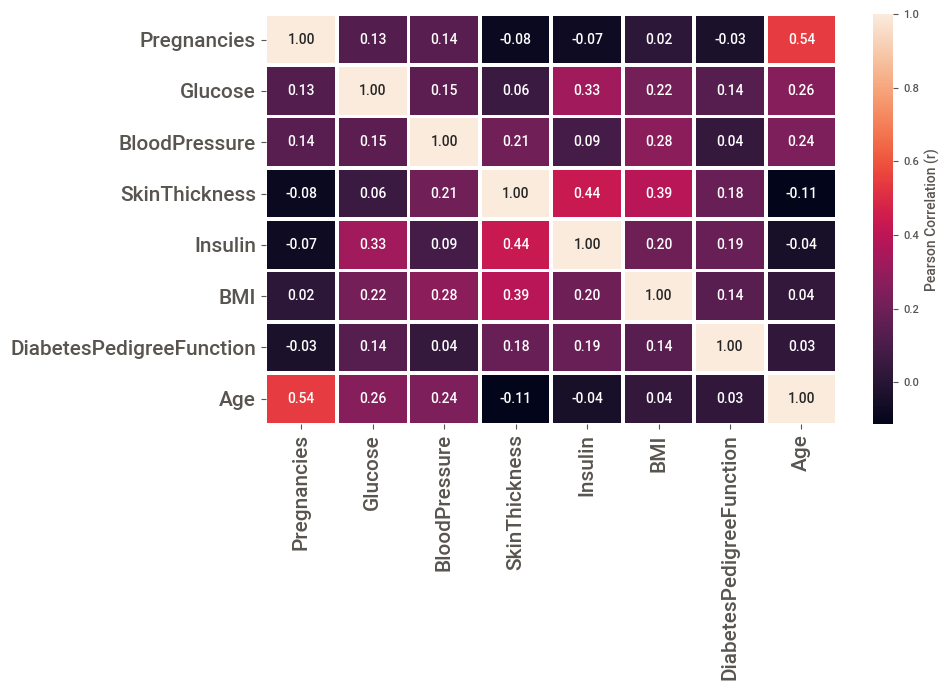

In [250]:
plt.figure(figsize=(10,7))
corr_mat = df.iloc[:,:-1].corr()
sns.heatmap(corr_mat, fmt='0.2f', annot=True, lw=2, cbar_kws={'label':'Pearson Correlation (r)'})
plt.xticks(size=15,rotation=90)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('Correlation.png',dpi=300);

* All the features hold very little correlation amongst each other. Only age and pregnancies shows a significant  strong correlation. Therefore, keeping the all the features. 

## Class distribution in Diabetes dataset

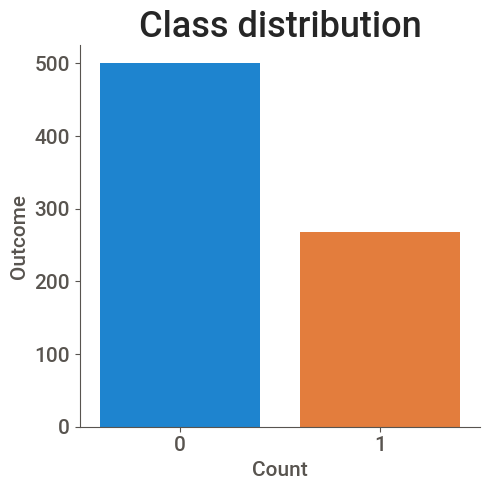

In [293]:
plt.figure(figsize=(5,5))
sns.countplot(df['Outcome'],label='Count')
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Outcome',size=15)
plt.xlabel('Count',size=15)
sns.despine(top=True)
plt.title('Class distribution',size=26, weight='bold')
plt.tight_layout()
plt.savefig('Class-distribution.png');

# Preparing data for machine learning

In [186]:
X = df.iloc[:,:-1].values   ##features selection
y = df.iloc[:,-1].values    ## target selection

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=27)

* It is importannt to use stratify inside **train_test_split**. It keeps the same distribution of target same  within train and testing datasets. if variable `y` is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, `stratify=y` will make sure that random split has 40% of 0's and 60% of 1's

# Machine learning Models

## k-Nearest Neighbors (KNN)

In [188]:
training_accuracy = [] 
test_accuracy = []
training_f1 = []
test_f1 = []

neighbors_settings = range(2,20)

for n_neighbors in neighbors_settings:
    print(f'working on neighbors {n_neighbors}')
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    y_train_pred=knn.predict(X_train)
    y_pred=knn.predict(X_test)
    
    training_accuracy.append(accuracy_score(y_train,y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_pred))
    
    training_f1.append(f1_score(y_train,y_train_pred))
    test_f1.append(f1_score(y_test, y_pred))
    

working on neighbors 2
working on neighbors 3
working on neighbors 4
working on neighbors 5
working on neighbors 6
working on neighbors 7
working on neighbors 8
working on neighbors 9
working on neighbors 10
working on neighbors 11
working on neighbors 12
working on neighbors 13
working on neighbors 14
working on neighbors 15
working on neighbors 16
working on neighbors 17
working on neighbors 18
working on neighbors 19


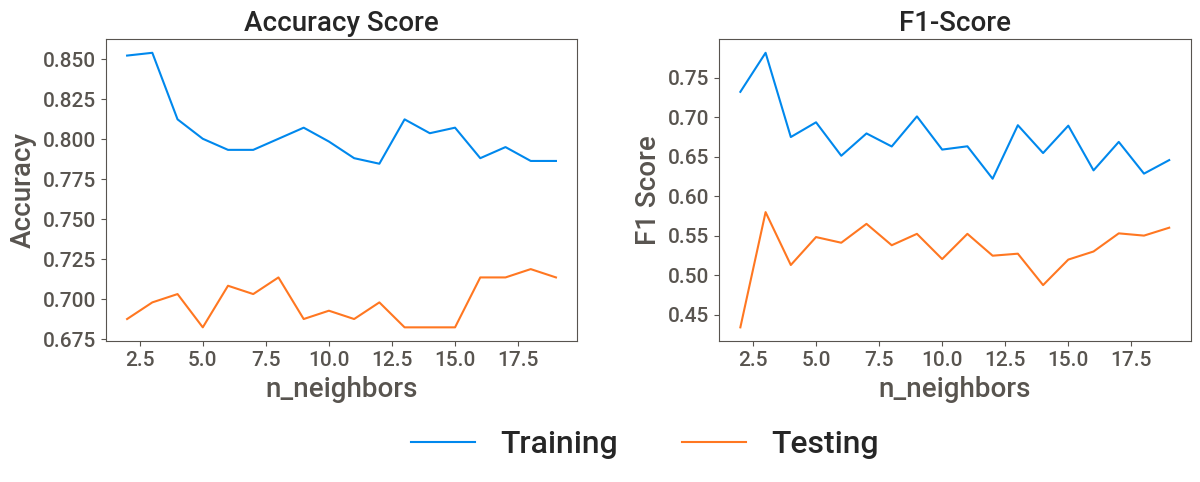

In [189]:
fig = plt.figure(figsize=(14,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

fig.add_subplot(2,2,1)
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('n_neighbors',size=20)
plt.title('Accuracy Score',size=20, weight='bold')
plt.legend([],frameon=False)

fig.add_subplot(2,2,2)
plt.plot(neighbors_settings, training_f1)
plt.plot(neighbors_settings, test_f1)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('F1 Score',size=20)
plt.xlabel('n_neighbors',size=20)
plt.title('F1-Score',size=20,weight='bold')
plt.legend(['Training','Testing'],frameon=False, bbox_to_anchor=(0.4,-0.2), ncol=2);


`Accuracy score`, `F1-score` suggest that `n_neighbors=19` is the optimum choice **(by looking a testing accuracies)**. 

In [190]:
knn = KNeighborsClassifier(n_neighbors=19).fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('F1-score of K-NN classifier on test set: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy of K-NN classifier on test set: 0.79
Accuracy of K-NN classifier on test set: 0.71
F1-score of K-NN classifier on test set: 0.56


### Confusion matrix

In [191]:
def normalized_confusion_matrix(y_test, conf_mat, model):
    _ , counts = np.unique(y_test,return_counts=True)
    conf_mat = conf_mat/counts
    plt.figure(figsize=(6,5))
    ax=sns.heatmap(conf_mat,fmt='.2f',annot=True,annot_kws={'size':20},lw=2, cbar=True, cbar_kws={'label':'% Class accuracy'})
    plt.title(f'Confusion Matrix ({model})',size=22)
    plt.xticks(size=20)
    plt.yticks(size=20)
    ax.figure.axes[-1].yaxis.label.set_size(20) ##colorbar label
    cax = plt.gcf().axes[-1]  ##colorbar ticks
    cax.tick_params(labelsize=20) ## colorbar ticks
    plt.savefig(f'confusion-matrix-{model}.png',dpi=300)

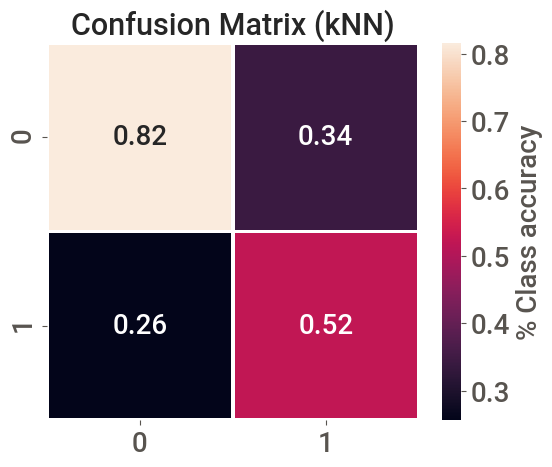

In [192]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat, 'kNN')

### K-fold cross validation

In [193]:
k_fold_knn_accuracy = cross_val_score(knn, X, y, cv=10) ##10-fold cross validation
k_fold_knn_f1 = cross_val_score(knn, X, y, cv=10, scoring='f1_macro') ##10-fold cross validation

In [194]:
print(f'Average accuracy after 10 fold cross validation :{k_fold_knn_accuracy.mean().round(2)} +/- {k_fold_knn_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_knn_f1.mean().round(2)} +/- {k_fold_knn_f1.std().round(2)}')

Average accuracy after 10 fold cross validation :0.75 +/- 0.06
Average F1-score after 10 fold cross validation :0.71 +/- 0.07


## Logistic Regression

C : 1 Training set accuracy: 0.778
C : 1 Test set accuracy: 0.776
C : 1 Training set F1-score: 0.646
C : 1 Test set F1-score: 0.650


C : 0.01 Training set accuracy: 0.776
C : 0.01 Test set accuracy: 0.766
C : 0.01 Training set F1-score: 0.645
C : 0.01 Test set F1-score: 0.634


C : 100 Training set accuracy: 0.774
C : 100 Test set accuracy: 0.771
C : 100 Training set F1-score: 0.641
C : 100 Test set F1-score: 0.645




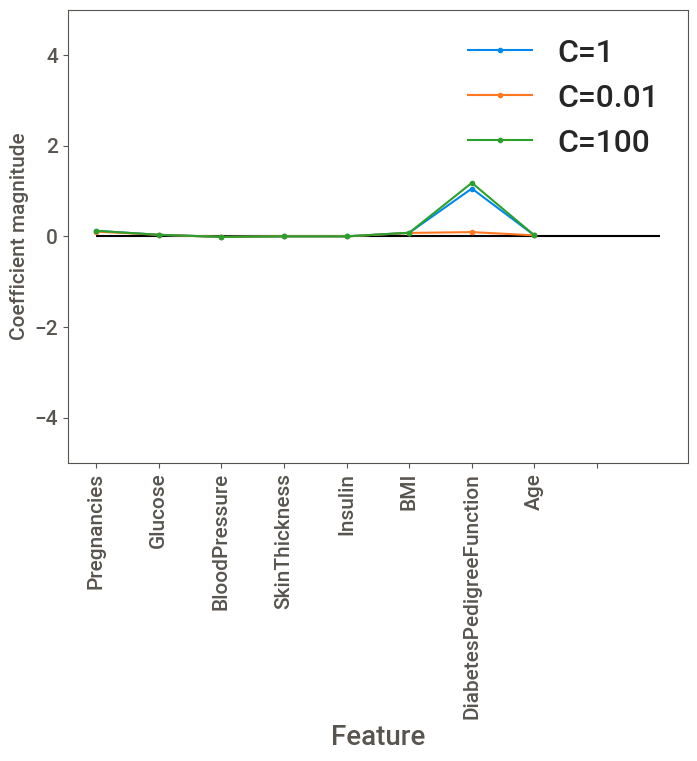

In [195]:
plt.figure(figsize=(8,6))
Clist=[1,0.01,100]

for C in Clist : 

    logreg = LogisticRegression(C=C,solver='newton-cg').fit(X_train, y_train) #keeping C=1 a
    y_train_pred = logreg.predict(X_train)
    y_pred = logreg.predict(X_test)

    print('C : {} Training set accuracy: {:.3f}'.format(C,accuracy_score(y_train, y_train_pred)))
    print('C : {} Test set accuracy: {:.3f}'.format(C,accuracy_score(y_test, y_pred)))

    print('C : {} Training set F1-score: {:.3f}'.format(C,f1_score(y_train, y_train_pred)))
    print('C : {} Test set F1-score: {:.3f}'.format(C, f1_score(y_test, y_pred)))
    print('\n')
    
    diabetes_features = [x for i,x in enumerate(df.columns) if i!=8]
    plt.plot(logreg.coef_.T, marker='o', label=f"C={C}")

plt.xticks(range(df.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, df.shape[1])
plt.ylim(-5, 5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Feature",size=20)
plt.ylabel("Coefficient magnitude",size=15)
plt.legend(frameon=False)

The default value of C=1 provides with 78% accuracy on training and 77% accuracy on test set.

Stronger regularization (`C=0.001`) pushes coefficients more and more toward zero. Inspecting the plot more closely suggests that feature `DiabetesPedigreeFunction`, for `C=100`, `C=1` and `C=0.001`, the coefficient is positive. This indicates that high `DiabetesPedigreeFunctio` feature is related to a sample being`diabetes`, regardless which model we look at.

### Confusion matrix

In [196]:
logreg = LogisticRegression(C=1,solver='newton-cg').fit(X_train,y_train)
y_pred=logreg.predict(X_test)

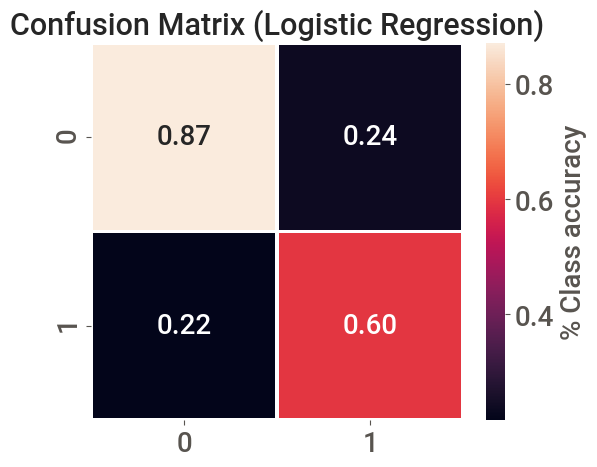

In [197]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'Logistic Regression')

### K-fold cross validation

In [198]:
k_fold_logreg_accuracy = cross_val_score(logreg, X, y, cv=10) ##10-fold cross validation
k_fold_logreg_f1 = cross_val_score(logreg, X, y, cv=10, scoring='f1_macro') ##10-fold cross validation

In [199]:
print(f'Average accuracy after 10 fold cross validation :{k_fold_logreg_accuracy.mean().round(2)} +/- {k_fold_logreg_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_logreg_f1.mean().round(2)} +/- {k_fold_logreg_f1.std().round(2)}')

Average accuracy after 10 fold cross validation :0.77 +/- 0.04
Average F1-score after 10 fold cross validation :0.74 +/- 0.04


## Decision Tree

In [200]:
max_depth=range(1,20)
training_accuracy = [] 
test_accuracy = []
training_f1 = []
test_f1 = []

for depth in max_depth : 
    tree = DecisionTreeClassifier(random_state=0, max_depth=depth, min_samples_leaf=1).fit(X_train, y_train)
    y_train_pred = tree.predict(X_train)
    y_pred = tree.predict(X_test)
    
    training_accuracy.append(accuracy_score(y_train,y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_pred))
    
    training_f1.append(f1_score(y_train,y_train_pred))
    test_f1.append(f1_score(y_test, y_pred))

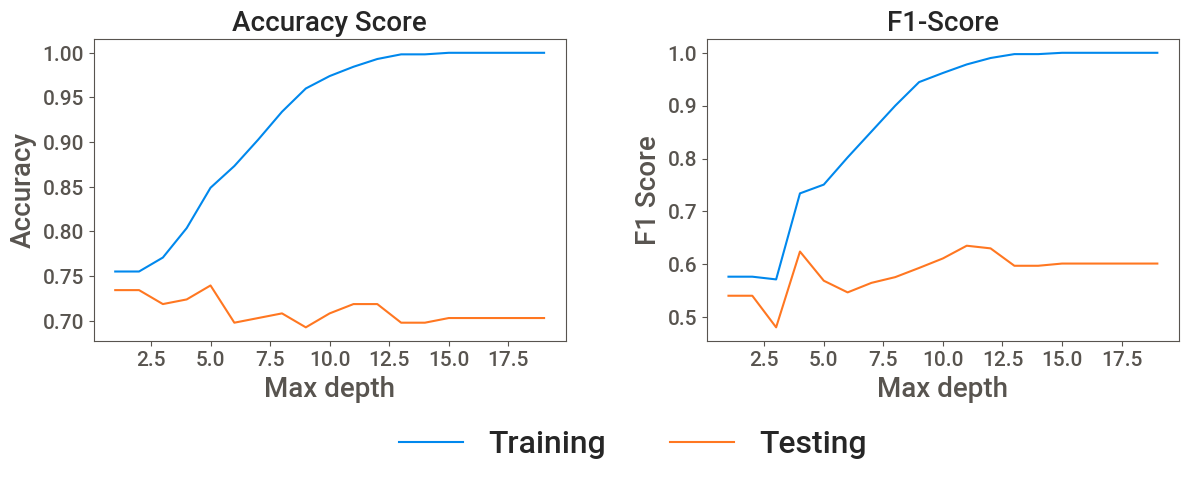

In [201]:
fig = plt.figure(figsize=(14,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

fig.add_subplot(2,2,1)
plt.plot(max_depth, training_accuracy, label='training accuracy')
plt.plot(max_depth, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy',size=20)
plt.xlabel('Max depth',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Accuracy Score',size=20, weight='bold')
plt.legend([],frameon=False)

fig.add_subplot(2,2,2)
plt.plot(max_depth, training_f1)
plt.plot(max_depth, test_f1)
plt.ylabel('F1 Score',size=20)
plt.xlabel('Max depth',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('F1-Score',size=20,weight='bold')
plt.legend(['Training','Testing'],frameon=False, bbox_to_anchor=(0.4,-0.2), ncol=2);


The training accuracy on the after training set is 100%, while the test set accuracy is much worse. This means tree is  overfitting and not generalizing well to new data. We set `max_depth=4`, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [202]:
tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1, random_state=0).fit(X_train, y_train)
y_pred=tree.predict(X_test)

print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))

Accuracy on test: 0.724
F1-score on test set: 0.624


### Confusion matrix

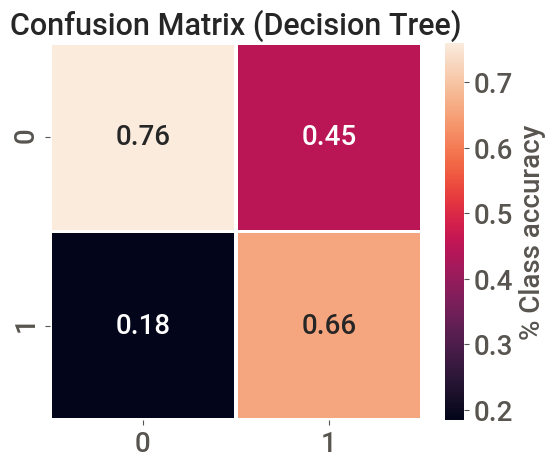

In [203]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'Decision Tree')

### K-fold cross validation

In [204]:
k_fold_tree_accuracy = cross_val_score(tree, X, y, cv=10) ##10-fold cross validation
k_fold_tree_f1 = cross_val_score(tree, X, y, cv=10, scoring='f1_macro') ##10-fold cross validation

In [205]:
print(f'Average accuracy after 10 fold cross validation :{k_fold_tree_accuracy.mean().round(2)} +/- {k_fold_tree_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_tree_f1.mean().round(2)} +/- {k_fold_tree_f1.std().round(2)}')

Average accuracy after 10 fold cross validation :0.72 +/- 0.04
Average F1-score after 10 fold cross validation :0.69 +/- 0.05


### Feature importance in Decision trees
Feature importance rates how important each feature is for the decision a tree makes. It is a number between 0 and 1

     0 means “not used at all” 
     1 means “perfectly predicts the target”

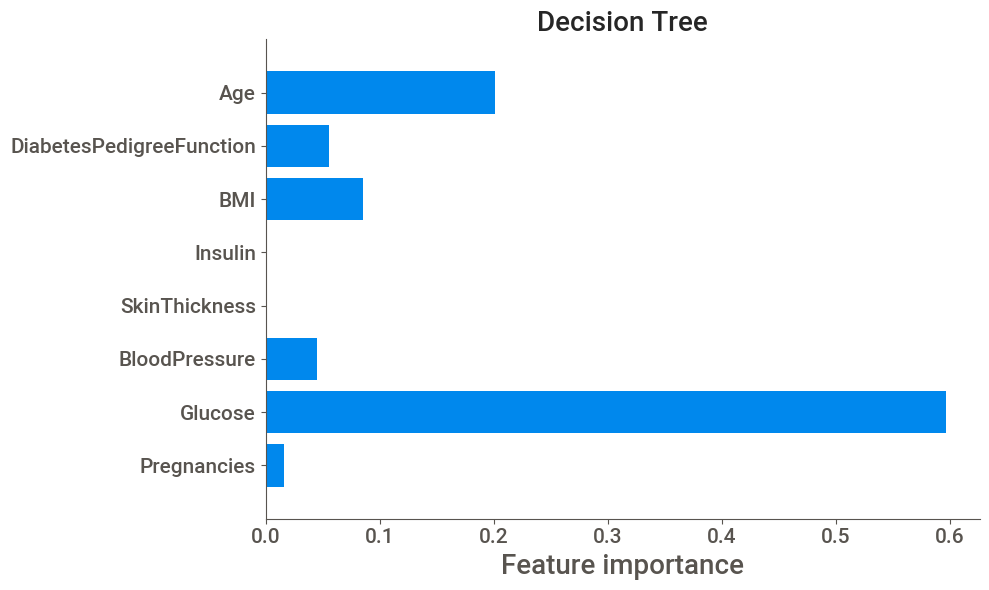

In [252]:
def plot_feature_importances(model, figure):
    n_features = 8
    plt.figure(figsize=(10,6))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features,size=15)
    plt.xticks(size=15)
    plt.xlabel('Feature importance',size=20,)
    #plt.ylabel('Feature',size=20)
    plt.ylim(-1, n_features)
    sns.despine(top=True)
    plt.title(f'{figure}',size=20)
    plt.tight_layout()
    plt.savefig(f'feature-image{figure}.png',dpi=300)

plot_feature_importances(tree,'Decision Tree')

Feature `Glucose` is the most important feature.

## Random Forest

In [253]:
rf = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
y_pred=rf.predict(X_test)

print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))

Accuracy on test: 0.740
F1-score on test set: 0.603


 The default parameters of the random forest work well. This conclusion is derived after trying various values of  `max_depth` and `n_estimators`. 

### Feature importance in Random Forest

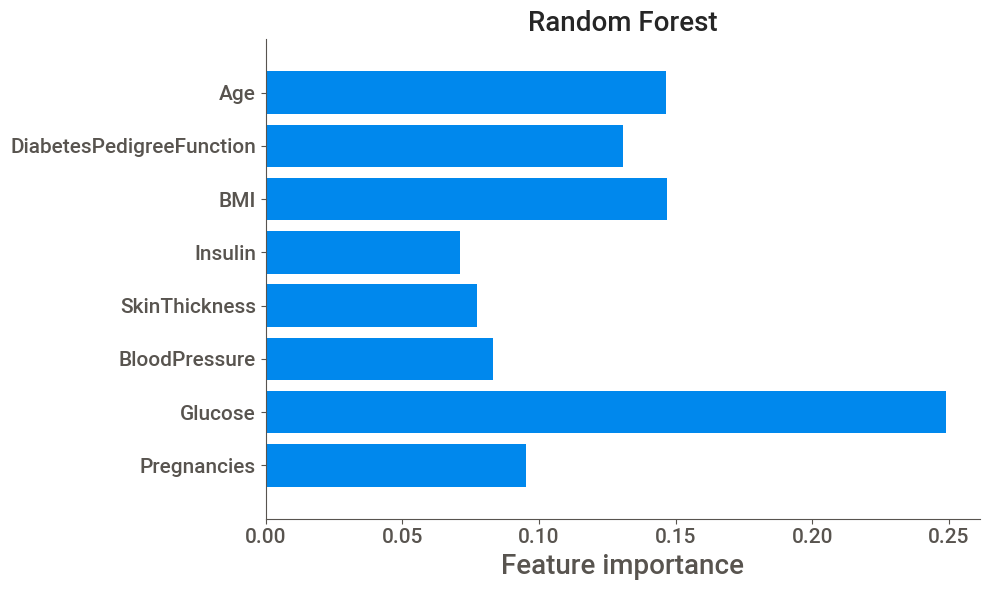

In [255]:
plot_feature_importances(rf, 'Random Forest')

Similarly to the single decision tree, the random forest also gives a lot of importance to the `Glucose` feature and it also chooses `BMI` to be the 2nd most informative features. 

### Confusion matrix

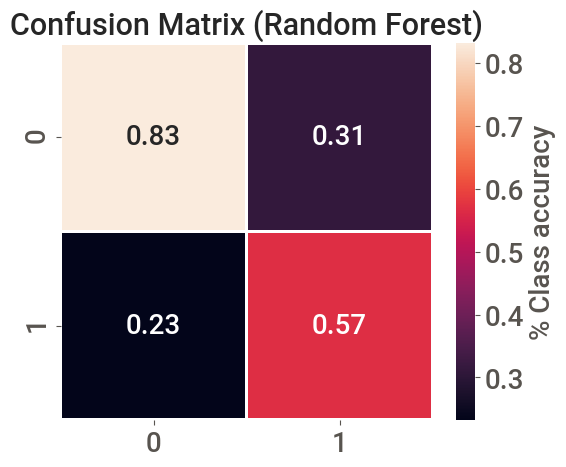

In [256]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'Random Forest')

### K-fold cross-validation

In [257]:
k_fold_rf_accuracy = cross_val_score(rf, X, y, cv=10) ##10-fold cross validation
k_fold_rf_f1 = cross_val_score(rf, X, y, cv=10, scoring='f1_macro') ##10-fold cross validation

In [258]:
print(f'Average accuracy after 10 fold cross validation :{k_fold_tree_accuracy.mean().round(2)} +/- {k_fold_tree_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_tree_f1.mean().round(2)} +/- {k_fold_tree_f1.std().round(2)}')

Average accuracy after 10 fold cross validation :0.72 +/- 0.04
Average F1-score after 10 fold cross validation :0.69 +/- 0.05


# Model comparision

In [230]:
all_accuracies = [k_fold_knn_accuracy.mean().round(2),
                   k_fold_logreg_accuracy.mean().round(2),
                   k_fold_tree_accuracy.mean().round(2),
                   k_fold_rf_accuracy.mean().round(2),
                   k_fold_gb_accuracy.mean().round(2),
                   k_fold_svm_accuracy.mean().round(2),
                   k_fold_mlp_accuracy.mean().round(2),
                   k_fold_xgb_accuracy.mean().round(2)]

all_accuracies_errors = [k_fold_knn_accuracy.std().round(2),
                   k_fold_logreg_accuracy.std().round(2),
                   k_fold_tree_accuracy.std().round(2),
                   k_fold_rf_accuracy.std().round(2),
                   k_fold_gb_accuracy.std().round(2),
                   k_fold_svm_accuracy.std().round(2),
                   k_fold_mlp_accuracy.std().round(2),
                   k_fold_xgb_accuracy.std().round(2)]

In [231]:
all_f1 = [k_fold_knn_accuracy.mean().round(2),
                   k_fold_logreg_f1.mean().round(2),
                   k_fold_tree_f1.mean().round(2),
                   k_fold_rf_f1.mean().round(2),
                   k_fold_gb_f1.mean().round(2),
                   k_fold_svm_f1.mean().round(2),
                   k_fold_mlp_f1.mean().round(2),
                   k_fold_xgb_f1.mean().round(2)]

all_f1_errors = [k_fold_knn_f1.std().round(2),
                   k_fold_logreg_f1.std().round(2),
                   k_fold_tree_f1.std().round(2),
                   k_fold_rf_f1.std().round(2),
                   k_fold_gb_f1.std().round(2),
                   k_fold_svm_f1.std().round(2),
                   k_fold_mlp_f1.std().round(2),
                   k_fold_xgb_f1.std().round(2)]

In [232]:
models=['kNN','Logistic Regression','Decision Tree','Random Forest','Gradient Boosting','SVM','Neural Networks', 'XGBoost']

In [233]:
model_data = pd.DataFrame([all_accuracies,all_accuracies_errors,all_f1,all_f1_errors],columns=models, index = ['Accuracy','STD_acc','F1-macro','STD_f1']).T

In [234]:
model_data.style.background_gradient(cmap='coolwarm',axis=0)

,Accuracy,STD_acc,F1-macro,STD_f1
kNN,0.750000,0.060000,0.750000,0.070000
Logistic Regression,0.770000,0.040000,0.740000,0.040000
Decision Tree,0.720000,0.040000,0.690000,0.050000
Random Forest,0.760000,0.060000,0.730000,0.060000
Gradient Boosting,0.750000,0.030000,0.670000,0.030000
SVM,0.760000,0.030000,0.720000,0.030000
Neural Networks,0.770000,0.040000,0.730000,0.040000
XGBoost,0.750000,0.060000,0.720000,0.070000


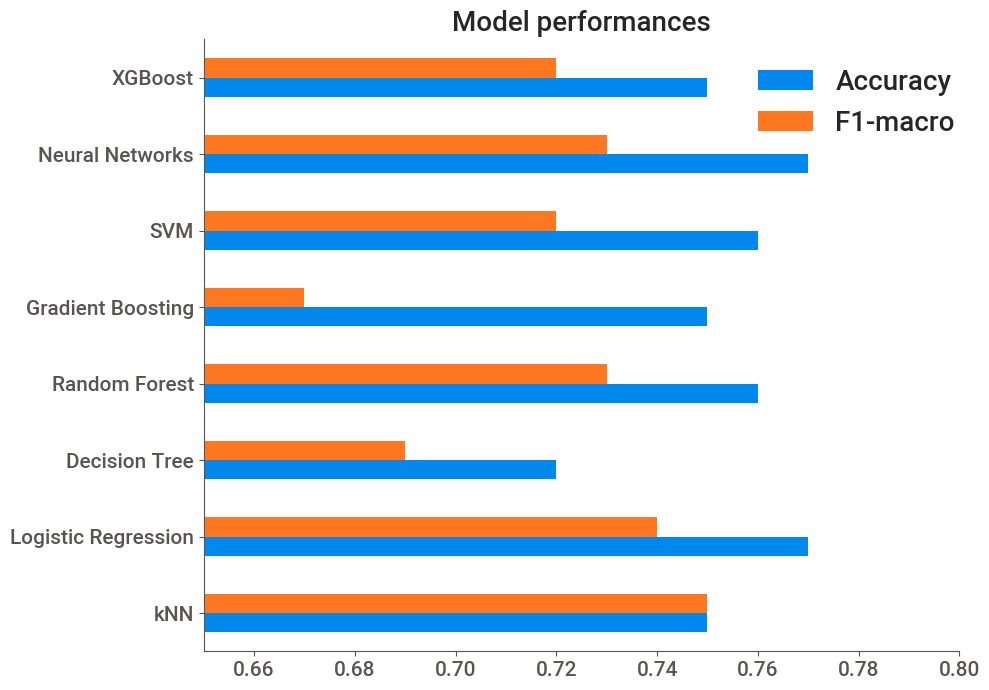

In [290]:
model_data[['Accuracy','F1-macro']].plot.barh(figsize=(10,7))
plt.legend(frameon=False,bbox_to_anchor=(0.7,0.8), prop={'size':20})
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim([0.65,0.8]);
plt.title('Model performances',size=20)
sns.despine(top=True)
plt.tight_layout()
plt.savefig('model-comparision.png',dpi=300)


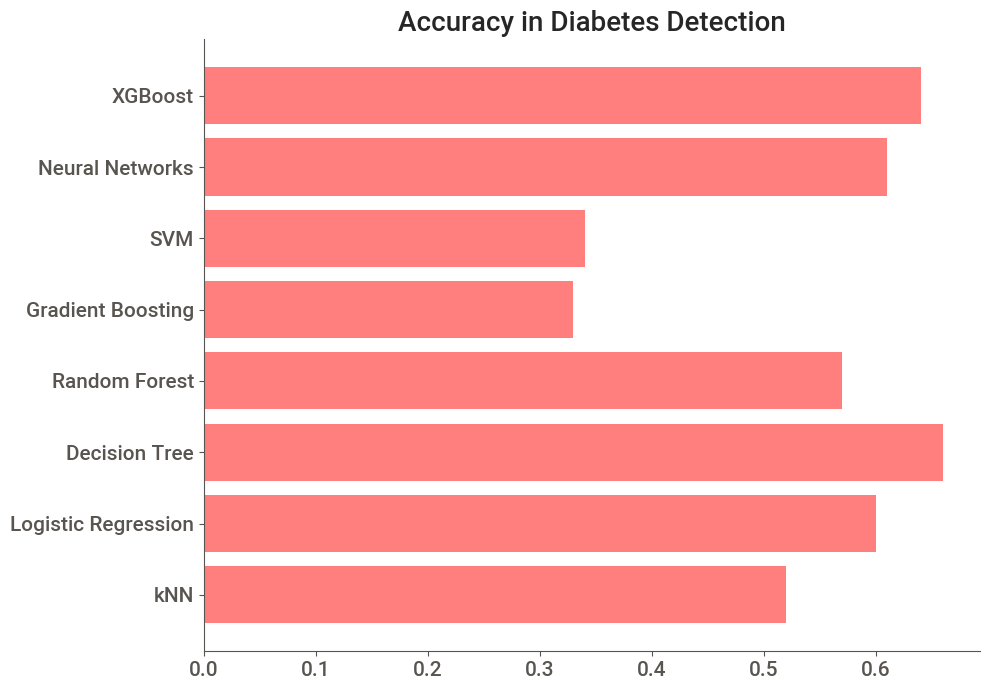

In [291]:
plt.figure(figsize=(10,7))
diabetes_accuracy = [0.52, 0.60, 0.66, 0.57, 0.33, 0.34, 0.61, 0.64]
plt.barh(models,diabetes_accuracy, color='red',alpha=0.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Accuracy in Diabetes Detection',size=20)
sns.despine(top=True)
plt.tight_layout()
plt.savefig('diabetes-detection.png',dpi=300)

# Conclusion 

* **Logistic regression** to provide the best performance based on **10-fold cross validation** of the dataset. **Logistic regression** achieves a higher *F1-score* as well, which is better metric for model evalution.
* From the confusion matricies, decision tree has the highest success in detecting the diabetes.
* **Feature selection** suggests the `Glucose` is the most crucial factor for the successful prediction of diabetes. 